# Proyek Analisis Data: E-Commerce Public Dataset
*   Nama : Nicholas Indradjaja
*   Email : nicholasid02@gmail.com
*   Id Dicoding : nicholas_indradjaja





# Menentukan Pertanyaan Bisnis
*   Bagaimana performa revenue dan penjualan untuk tiap bulannya ?
*   Berapa biaya pengiriman yang pelanggan keluarkan ?
*   Bagaimana demografi dari pelanggan ?
*   Berapa lama proses pengiriman dari penjual ke pembeli ?
*   Bagaimana RFM nya ?


# Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

###GATHERING DATA

Load Data

In [2]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv("product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


###ASSESSING DATA

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi Data Table:", customers_df.duplicated().sum())

Jumlah duplikasi Data Table: 0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
print("Jumlah Duplikasi Data Table: ", order_items_df.duplicated().sum())

Jumlah Duplikasi Data Table:  0


In [18]:
order_items_df.describe()
# freight_value = biaya pengiriman dari penjual ke pembeli

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [19]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [20]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [21]:
print("Jumlah Duplikasi Data Table: ", geolocation_df.duplicated().sum())
# Terjadi banyak data yang sama karena memiliki titik lokasi yang sama

Jumlah Duplikasi Data Table:  261831


In [22]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [23]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
print("Jumlah Duplikasi Data Table: ", order_payments_df.duplicated().sum())

Jumlah Duplikasi Data Table:  0


In [26]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
order_reviews_df.isna().sum()
# Untuk data null tidak masalah, akan kita gunakan untuk perbandingan pada bagian grafik

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [29]:
print("Jumlah Duplikasi Data Table: ", order_reviews_df.duplicated().sum())

Jumlah Duplikasi Data Table:  0


In [30]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date" ]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [33]:
orders_df.isna().sum()
# order.approved_at null bisa disebabkan karna pembayaraan tertunda, pesanan ditolak
# order_delivered_carrier_date null bisa disebabkan pesanan belum terkirim
# order_delivered_customer_date null bisa disebabkan pesana belum diterima pembeli

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [34]:
print("Jumlah Duplikasi Data Table: ", orders_df.duplicated().sum())

Jumlah Duplikasi Data Table:  0


In [35]:
orders_df.describe()

<ipython-input-35-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-35-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-35-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-35-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categoric

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,NaN


In [36]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [37]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [38]:
print("Jumlah Duplikasi Data Table: ", product_category_df.duplicated().sum())

Jumlah Duplikasi Data Table:  0


In [39]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [40]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
products_df.isna().sum()
# Harus dilakukan penghapusan

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [42]:
print("Jumlah Duplikasi Data Table: ", products_df.duplicated().sum())

Jumlah Duplikasi Data Table:  0


In [43]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [44]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
print("Jumlah Duplikasi Data Table: ", sellers_df.duplicated().sum())

Jumlah Duplikasi Data Table:  0


In [47]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### CLEANING DATA

In [48]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [49]:
products_df.dropna(inplace=True)

In [50]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

# Exploratory Data Analysis (EDA)

In [51]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [52]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [53]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [54]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [55]:
# Mencari berapa lama pengiriman dalam hitungan hari


orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])

delivery_time = orders_df.order_delivered_customer_date	- orders_df.order_delivered_carrier_date
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df['delivery_time'] = round(delivery_time/86400)

In [56]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0


Ekpsloirasi customer dan order

In [57]:
# Membuat column baru status (active untuk yg pernah order) (Not Active untuk yg belum pernah order)

customer_orders_df = orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(lambda x: "Active" if x in customer_orders_df else "Non Active")
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
9295,21ef1bd33861d802ea6a9126730d9385,fac397dd5143f305cee12a7c331d3d5c,2993,sao paulo,SP,Active
11425,d78521153aeb150f08bf0ddb3cfcba84,35ea3181ac054386b2ae83b29bef9b20,4720,sao paulo,SP,Active
82124,a5d1dcff78d0fed7c29d371ae3e60da3,b2869304b7b5d007e152903d14237c4d,97030,santa maria,RS,Active
28496,ae4ea94a9194fc1983a936c91597756b,1f642a984771461accb55dcfe92e5546,33935,ribeirao das neves,MG,Active
77173,8f625d0098d0ef8da8da0cb9af210b77,e1c4798d7f0426ae0df590d06a86b111,2022,sao paulo,SP,Active
11172,e98f0d8792d9c8c99ecaca12bbb15665,572dc4edf5b4d140110f8a427b9ae6a0,8664,suzano,SP,Active
26538,135a5956797e7322fb86fa4925b1463d,83bbdfc5767b40bda08721ba85b619a8,35195,belo oriente,MG,Active
9656,64b570a964113efddd6cf2cd27903e99,94a9b38bde4ef7222a020881d83ef10f,24421,sao goncalo,RJ,Active
44993,bea2a6e6464aa7481ee645138019c6b2,b913c130246d345c57a5e685d522b2d3,88210,porto belo,SC,Active
94246,b4fa94736ab408774c4f9c5f86daa818,d31e23d330e7ce67e5e22af44d244ba1,4671,sao paulo,SP,Active


In [58]:
customers_df.groupby(by="status").customer_id.nunique()

status
Active    99441
Name: customer_id, dtype: int64

In [59]:
# Join table customers_df dan orders_df

orders_customers_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)

orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [60]:
# Jumlah order berdasarkan kota

orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: order_id, Length: 4119, dtype: int64

In [61]:
# Jumlah order berdasarkan state

orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

In [62]:
# Rata-rata waktu yang diperlukan untuk barang di terima dari penjual ke pembeli berdasarkan customer_city

average_delivery_time_by_city = orders_customers_df.groupby('customer_city').delivery_time.mean().sort_values(ascending=False).reset_index()
print(average_delivery_time_by_city)

                 customer_city  delivery_time
0                  novo brasil          146.0
1            capinzal do norte          104.5
2            adhemar de barros           92.0
3                        arace           81.5
4             marcelino vieira           72.0
...                        ...            ...
4114    santo antonio de goias            NaN
4115       sao domingos do sul            NaN
4116              sao fernando            NaN
4117  sao francisco do humaita            NaN
4118      sao joao do itaperiu            NaN

[4119 rows x 2 columns]


In [63]:
# Rata-rata waktu yang diperlukan untuk barang di terima dari penjual ke pembeli berdasarkan customer_city

average_delivery_time_by_state = orders_customers_df.groupby('customer_state').delivery_time.mean().sort_values(ascending=False).reset_index()
print(average_delivery_time_by_state)

   customer_state  delivery_time
0              RR      25.560976
1              AP      23.611940
2              AM      23.462069
3              AL      21.062972
4              PA      20.246300
5              MA      17.914923
6              SE      17.910448
7              CE      17.884285
8              AC      17.437500
9              PB      16.914894
10             RO      16.436214
11             PI      16.268908
12             BA      15.995700
13             RN      15.620253
14             PE      15.145009
15             MT      14.866817
16             TO      14.200730
17             GO      12.387839
18             MS      12.382311
19             ES      12.361404
20             RS      12.043413
21             RJ      11.957500
22             SC      11.612067
23             DF       9.763942
24             PR       8.749746
25             MG       8.732541
26             SP       5.563096


Ekpsloirasi customer dan order dan order_item

In [64]:
orders_item_customers_df = pd.merge(
    left =  orders_customers_df,
    right = order_items_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

orders_item_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [65]:
# Mencari rata - rata biaya pengiriman pembeli berdasarkan customeer_city
average_delivery_price_by_city = orders_item_customers_df.groupby('customer_city').freight_value.mean().reset_index()
print(average_delivery_price_by_city)

            customer_city  freight_value
0     abadia dos dourados      18.200000
1               abadiania      75.530000
2                  abaete      17.833333
3              abaetetuba      45.978571
4                 abaiara      34.625000
...                   ...            ...
4114             xinguara      32.629000
4115          xique-xique      16.923333
4116             zacarias      15.525000
4117              ze doca      38.064000
4118               zortea      18.885000

[4119 rows x 2 columns]


In [66]:
# Mencari rata - rata biaya pengiriman pembeli berdasarkan customeer_state
average_delivery_price_by_state = orders_item_customers_df.groupby('customer_state').freight_value.mean().reset_index()
print(average_delivery_price_by_state)

   customer_state  freight_value
0              AC      40.073370
1              AL      35.843671
2              AM      33.205394
3              AP      34.006098
4              BA      26.363959
5              CE      32.714202
6              DF      21.041355
7              ES      22.058777
8              GO      22.766815
9              MA      38.257002
10             MG      20.630167
11             MS      23.374884
12             MT      28.166284
13             PA      35.832685
14             PB      42.723804
15             PE      32.917863
16             PI      39.147970
17             PR      20.531652
18             RJ      20.960924
19             RN      35.652363
20             RO      41.069712
21             RR      42.984423
22             RS      21.735804
23             SC      21.470369
24             SE      36.653169
25             SP      15.147275
26             TO      37.246603


In [67]:
orders_item_reviews_customers_df = pd.merge(
    left = orders_item_customers_df,
    right = order_reviews_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

orders_item_reviews_customers_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0,7c396fd4830fd04220f754e42b4e5bff,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.0,af07308b275d755c9edb36a90c618231,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,9.0,7c142cf63193a1473d2e66489a9ae977,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [68]:
orders_item_reviews_customers_product_df = pd.merge(
    left = orders_item_reviews_customers_df,
    right = products_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)

orders_item_reviews_customers_product_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.0,af07308b275d755c9edb36a90c618231,...,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,9.0,7c142cf63193a1473d2e66489a9ae977,...,2017-12-03 00:00:00,2017-12-05 19:21:58,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,2018-02-17 00:00:00,2018-02-18 13:02:51,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [69]:
# Mencari rata - rata review score berdasarkan product category name

average_review_score_product = orders_item_reviews_customers_product_df.groupby('product_category_name').agg({
  "product_id" : "nunique",
  "review_score" : "mean"
})

print(average_review_score_product.sort_values(by="review_score", ascending=False))

                                               product_id  review_score
product_category_name                                                  
cds_dvds_musicais                                       1      4.642857
fashion_roupa_infanto_juvenil                           5      4.500000
livros_interesse_geral                                216      4.446266
construcao_ferramentas_ferramentas                     39      4.444444
flores                                                 14      4.419355
...                                                   ...           ...
moveis_escritorio                                     309      3.493183
pc_gamer                                                3      3.333333
portateis_cozinha_e_preparadores_de_alimentos          10      3.266667
fraldas_higiene                                        12      3.256410
seguros_e_servicos                                      2      2.500000

[73 rows x 2 columns]


In [70]:
all_df = pd.merge(
    left = orders_item_reviews_customers_product_df,
    right = sellers_df,
    how = "left",
    left_on = "seller_id",
    right_on = "seller_id"
)

all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0,7c396fd4830fd04220f754e42b4e5bff,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.0,af07308b275d755c9edb36a90c618231,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,9.0,7c142cf63193a1473d2e66489a9ae977,...,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP


In [71]:
# Mencari revenue tertinggi berdasarkan seller
all_df.groupby(['seller_city', 'seller_id']).agg({
    "product_id" : "nunique",
    "price" : "sum"
}).sort_values(by="price", ascending=False)

,,product_id,price
seller_city,seller_id,,
guariba,4869f7a5dfa277a7dca6462dcf3b52b2,95,229472.63
lauro de freitas,53243585a1d6dc2643021fd1853d8905,23,222776.05
ibitinga,4a3ca9315b744ce9f8e9374361493884,399,202999.12
sumare,fa1c13f2614d7b5c4749cbc52fecda94,289,194042.03
itaquaquecetuba,7c67e1448b00f6e969d365cea6b010ab,198,189417.67
...,...,...,...
curitiba,34aefe746cd81b7f3b23253ea28bef39,1,8.00
juiz de fora,702835e4b785b67a084280efca355756,1,7.60
sao paulo,1fa2d3def6adfa70e58c276bb64fe5bb,1,6.90


In [72]:
# Mencari revenue tertinggi berdasarkan product
all_df.groupby(['product_id', 'product_category_name']).agg({
    "seller_id" : "nunique",
    "price" : "sum"
}).sort_values(by="price", ascending=False)

,,seller_id,price
product_id,product_category_name,,
bb50f2e236e5eea0100680137654686c,beleza_saude,1,64210.00
6cdd53843498f92890544667809f1595,beleza_saude,1,54730.20
d6160fb7873f184099d9bc95e30376af,pcs,1,48899.34
d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,1,47214.51
99a4788cb24856965c36a24e339b6058,cama_mesa_banho,2,43292.26
...,...,...,...
2e8316b31db34314f393806fd7b6e185,papelaria,1,2.99
680cc8535be7cc69544238c1d6a83fe8,pet_shop,1,2.90
8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,1,2.55


In [73]:
# Mencari penjualan terbanyak berdasarkan product category name
a = all_df.groupby('product_category_name').agg({
    "product_id": "nunique",
    "order_id": "count"
}).reset_index()

a.rename(columns={
    "product_id": "id_product",
    "order_id": "jumlah_order"
}, inplace=True)

print(a)

        product_category_name  id_product  jumlah_order
0   agro_industria_e_comercio          74           212
1                   alimentos          82           510
2           alimentos_bebidas         104           280
3                       artes          55           209
4          artes_e_artesanato          19            24
..                        ...         ...           ...
68    sinalizacao_e_seguranca          93           199
69   tablets_impressao_imagem           9            83
70                  telefonia        1134          4550
71             telefonia_fixa         116           265
72      utilidades_domesticas        2335          6989

[73 rows x 3 columns]


In [74]:
# Number of Orders per Month (2018)

all_df['order_approved_at'] = pd.to_datetime(all_df['order_approved_at'])

all_df_2018 = all_df[all_df['order_approved_at'].dt.year == 2018]

monthly_orders_df = all_df_2018.resample(rule= 'M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price" : "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace = True)

print(monthly_orders_df)

  order_approved_at  order_count     revenue
0           January         7187   948241.86
1          February         6706   846804.87
2             March         7288   996685.71
3             April         6778   979095.12
4               May         7066  1019022.95
5              June         6164   870313.77
6              July         6176   879300.29
7            August         6620   879061.25
8         September            1      145.00


# Visualization Data & Explanatory Analysis

###Pertanyaan 1:

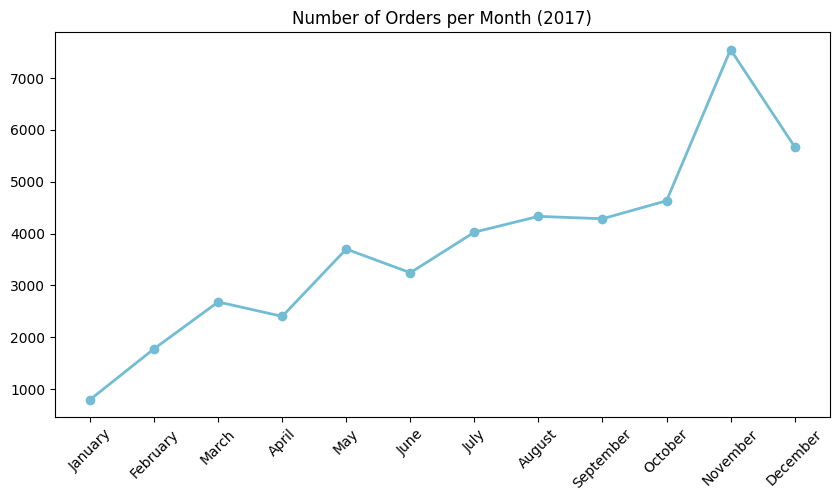

In [75]:
monthly_orders_df_2017 = all_df[all_df['order_purchase_timestamp'].dt.year == 2017]

monthly_orders_df = monthly_orders_df_2017.resample(rule= 'M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price" : "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace = True)

plt.figure(figsize=(10, 5))
plt.title("Number of Orders per Month (2017)")
plt.plot(monthly_orders_df.order_purchase_timestamp, monthly_orders_df.order_count, marker='o', linewidth=2, color="#72BCD4")
plt.xticks(rotation=45)
plt.show()

###Pertanyaan 3

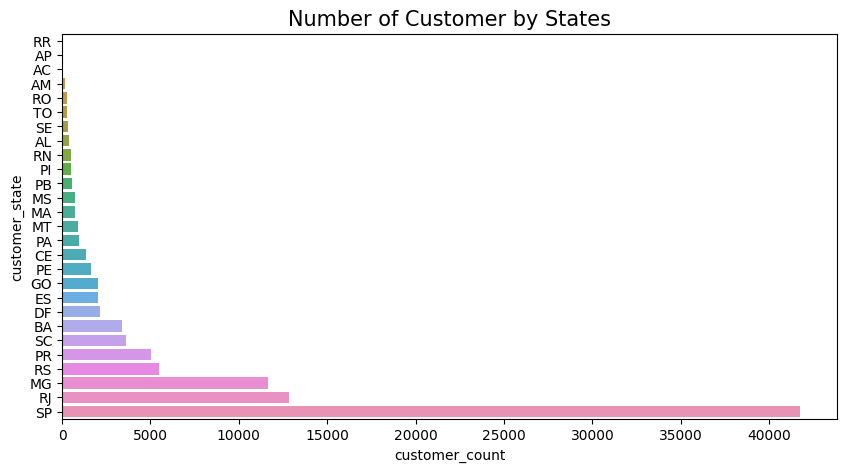

In [76]:
bystate_df = orders_customers_df.groupby(by="customer_state").customer_id.nunique()
bystate_df = bystate_df.reset_index()

bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace = True)


plt.figure(figsize=(10,5))

sns.barplot(
    x = "customer_count",
    y = "customer_state",
    data = bystate_df.sort_values(by="customer_count", ascending=True)
)

plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.show()

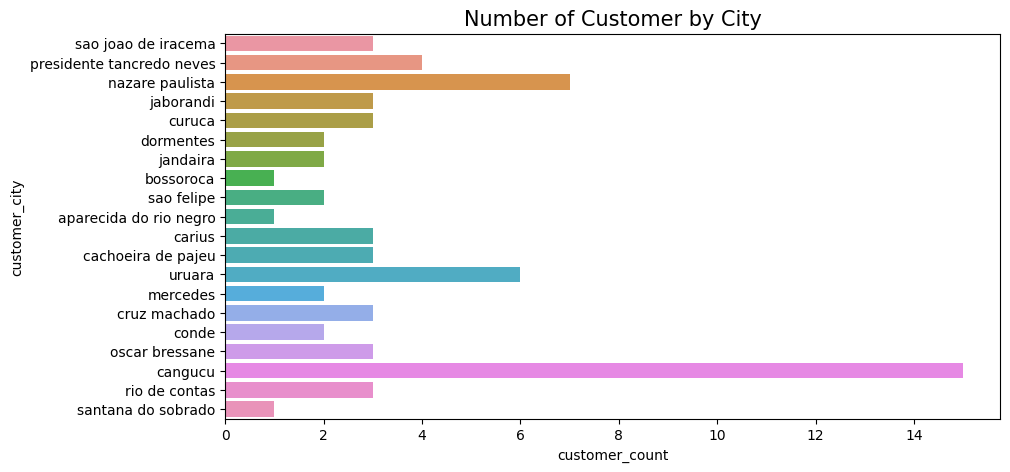

In [77]:
bycity_df = orders_customers_df.groupby(by="customer_city").customer_id.nunique()
bycity_df = bycity_df.reset_index()

bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace = True)


plt.figure(figsize=(10,5))

sns.barplot(
    x = "customer_count",
    y = "customer_city",
    data = bycity_df.sample(20)
)

plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.show()

###Pertanyaan 5

In [78]:
rfm_df = all_df.groupby('customer_id').agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})

rfm_df = rfm_df.reset_index()

rfm_df.rename(columns={
    "order_purchase_timestamp": "max_order_timestamp",
    "order_id": "frequency",
    "price": "monetary"
}, inplace = True)


# Pastikan kolom 'max_order_timestamp' memiliki tipe data datetime
rfm_df.max_order_timestamp = rfm_df.max_order_timestamp.dt.date

recent_date = orders_df.order_purchase_timestamp.dt.date.max()

rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)


rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,198


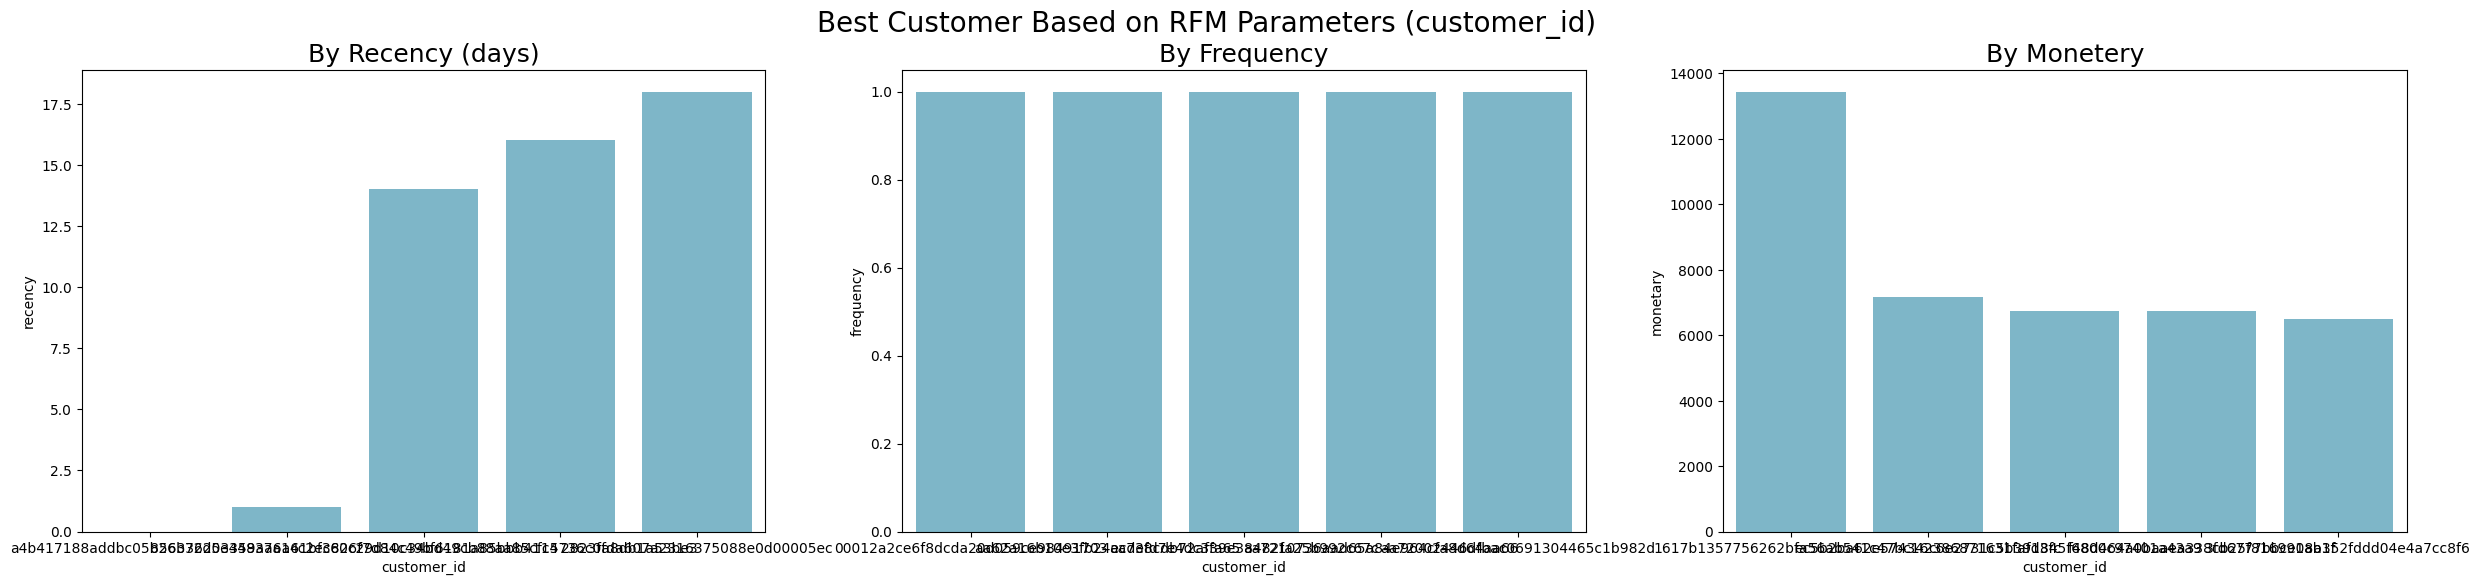

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_title("By Frequency", loc="center", fontsize=18)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_title("By Monetery", loc="center", fontsize=18)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

# Conclusion


*   Conclusion Pertanyaan 1 :
Dari grafik visualisasi jumlah pesanan per bulan tahun 2017 yang telah ditampilkan, terlihat bahwa ada tren fluktuasi dalam aktivitas pesanan selama tahun tersebut. Puncak tertinggi terjadi pada bulan November, yang mungkin terkait dengan peningkatan pesanan menuju musim liburan. Selama tahun 2017, jumlah pesanan mengalami fluktuasi bulanan, dengan beberapa bulan mengalami peningkatan pesanan yang signifikan dibandingkan dengan bulan sebelumnya. Ini bisa menjadi insight berharga untuk perencanaan stok dan strategi pemasaran, dengan penekanan pada memahami faktor-faktor yang memengaruhi fluktuasi tersebut. Selain itu, grafik juga menggambarkan pendapatan bulanan yang dihasilkan, yang juga menunjukkan tren yang mirip dengan jumlah pesanan. Dengan pemahaman ini, bisnis dapat mengoptimalkan operasi mereka untuk mengantisipasi fluktuasi pesanan dan memaksimalkan pendapatan selama puncak permintaan.

*   Conclusion Pertanyaan 2 :
Dari data dan grafik visualisasi rata-rata biaya pengiriman berdasarkan negara pelanggan yang ditampilkan, terlihat bahwa biaya pengiriman cenderung bervariasi antara negara-negara tersebut. Beberapa negara memiliki biaya pengiriman yang lebih tinggi (state RR) dibandingkan dengan yang lain, sementara beberapa negara memiliki biaya pengiriman yang lebih rendah (state (state SP). Analisis ini dapat memberikan wawasan berharga bagi bisnis dalam perencanaan strategi pengiriman dan penetapan harga produk, karena biaya pengiriman yang lebih tinggi mungkin memengaruhi keputusan pembelian pelanggan. Ini juga dapat membantu perusahaan dalam mengevaluasi efisiensi rantai pasokan mereka di berbagai negara, dengan fokus pada negara-negara yang mungkin memerlukan penyesuaian dalam manajemen biaya pengiriman.

*   Conclusion Pertanyaan 3 :
Dari grafik visualisasi jumlah pelanggan berdasarkan negara yang telah ditampilkan, dapat dilihat bahwa ada variasi yang signifikan dalam jumlah pelanggan di setiap negara. State SP menjadi negara dengan jumlah pelanggan terbanyak, diikuti oleh RJ dan MG. Sebaliknya, beberapa negara lain memiliki jumlah pelanggan yang lebih rendah (State RR, State AP, State AC). Analisis ini memberikan wawasan penting tentang sebaran basis pelanggan per negara, yang dapat membantu perusahaan dalam merancang strategi pemasaran yang lebih terfokus dan efisien serta dalam memahami di mana potensial pertumbuhan pelanggan mungkin diperlukan. Ini juga dapat membantu dalam penentuan alokasi sumber daya dan dukungan pelanggan yang sesuai dengan jumlah pelanggan di setiap negara.

*   Conclusion Pertanyaan 4 :
Dengan menghitung waktu pengirimanoleh pihak kurir hingga diterima oleh pelanggan dalam bentuk hari. Grafik visualisasi dari data ini akan memberikan wawasan tentang seberapa cepat atau lambat pengiriman biasanya berlangsung. Ini dapat digunakan untuk mengidentifikasi pola waktu pengiriman yang paling umum dan mengidentifikasi masalah potensial dalam rantai pasokan, seperti keterlambatan pengiriman. Dengan informasi ini, perusahaan dapat memonitor kinerja pihak kurir dan mengambil tindakan perbaikan jika diperlukan untuk meningkatkan kepuasan pelanggan dan menjaga kualitas layanan pengiriman. Analisis data ini dapat membantu dalam pengambilan keputusan yang lebih baik dalam manajemen rantai pasokan dan meningkatkan efisiensi pengiriman produk kepada pelanggan.

*   Conclusion Pertanyaan 5 :
Dari tiga grafik visualisasi yang ditampilkan berdasarkan analisis RFM (Recency, Frequency, Monetary) pelanggan, dapat disimpulkan beberapa hal penting. Grafik pertama menunjukkan tingkat "Recency," yaitu seberapa baru pelanggan melakukan pembelian. Pelanggan dengan tingkat Recency yang lebih rendah (artinya mereka baru-baru ini melakukan pembelian) ditampilkan sebagai pelanggan terbaik. Grafik kedua menunjukkan tingkat "Frequency," yang menggambarkan seberapa sering pelanggan melakukan pembelian. Pelanggan dengan tingkat Frequency yang tinggi ditampilkan sebagai pelanggan terbaik. Grafik terakhir menggambarkan tingkat "Monetary," yang mencerminkan total pengeluaran pelanggan. Pelanggan dengan pengeluaran tertinggi ditampilkan sebagai pelanggan terbaik.
Dalam contoh ini, kelompok pelanggan terbaik adalah yang memiliki Recency terendah, Frequency tertinggi, dan Monetary tertinggi. Analisis ini membantu dalam mengidentifikasi pelanggan berpotensi yang perlu diberikan penawaran khusus atau perhatian lebih lanjut dalam strategi pemasaran. Dengan memahami profil pelanggan terbaik ini, perusahaan dapat merancang kampanye yang lebih terfokus dan efisien untuk meningkatkan loyalitas pelanggan dan meningkatkan pendapatan.



In [80]:
all_df.to_csv("all_data.csv", index=False)

In [81]:
conda activate main-ds

ValueError: ignored

In [82]:
pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
